In [60]:
import numpy as np
import pylab as pl
import seaborn as sns
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [61]:
p_c = np.array([0.4, 0.6])

# interest probabilities
p_i = np.array([[0.3, 0.8], [0.9, 0.1]])

# Gaussian parameters
mus = np.array([100, 300])
sigmas = np.array([30, 100])

In [65]:
N = 100000
n_interests = p_i.shape[1]

C = np.zeros(N, dtype=int)
X_I = np.zeros((N, n_interests), dtype=int)
X_R = np.zeros(N)

for n in xrange(N):
    C[n] = np.argmax(np.random.multinomial(1, p_c)).astype(int)
    for i in xrange(n_interests):
        X_I[n, i] = int(np.random.random() < p_i[C[n], i])
    
    X_R[n] = np.random.normal(mus[C[n]], sigmas[C[n]])
    

df = pd.DataFrame({'romance': X_I[:, 0].tolist(), 'action': X_I[:, 1].tolist(), 'avg. price': X_R.tolist()})[['romance', 'action', 'avg. price']]
df.head(10)
# print C
# print X_I
# print X_R

,romance,action,avg. price
0,1,0,264.563366
1,1,1,100.852569
2,1,0,337.576899
3,0,1,105.545184
4,1,0,430.988385
5,1,0,284.593125
6,0,1,58.789076
7,0,1,116.824524
8,1,0,317.829967
9,1,1,146.660413


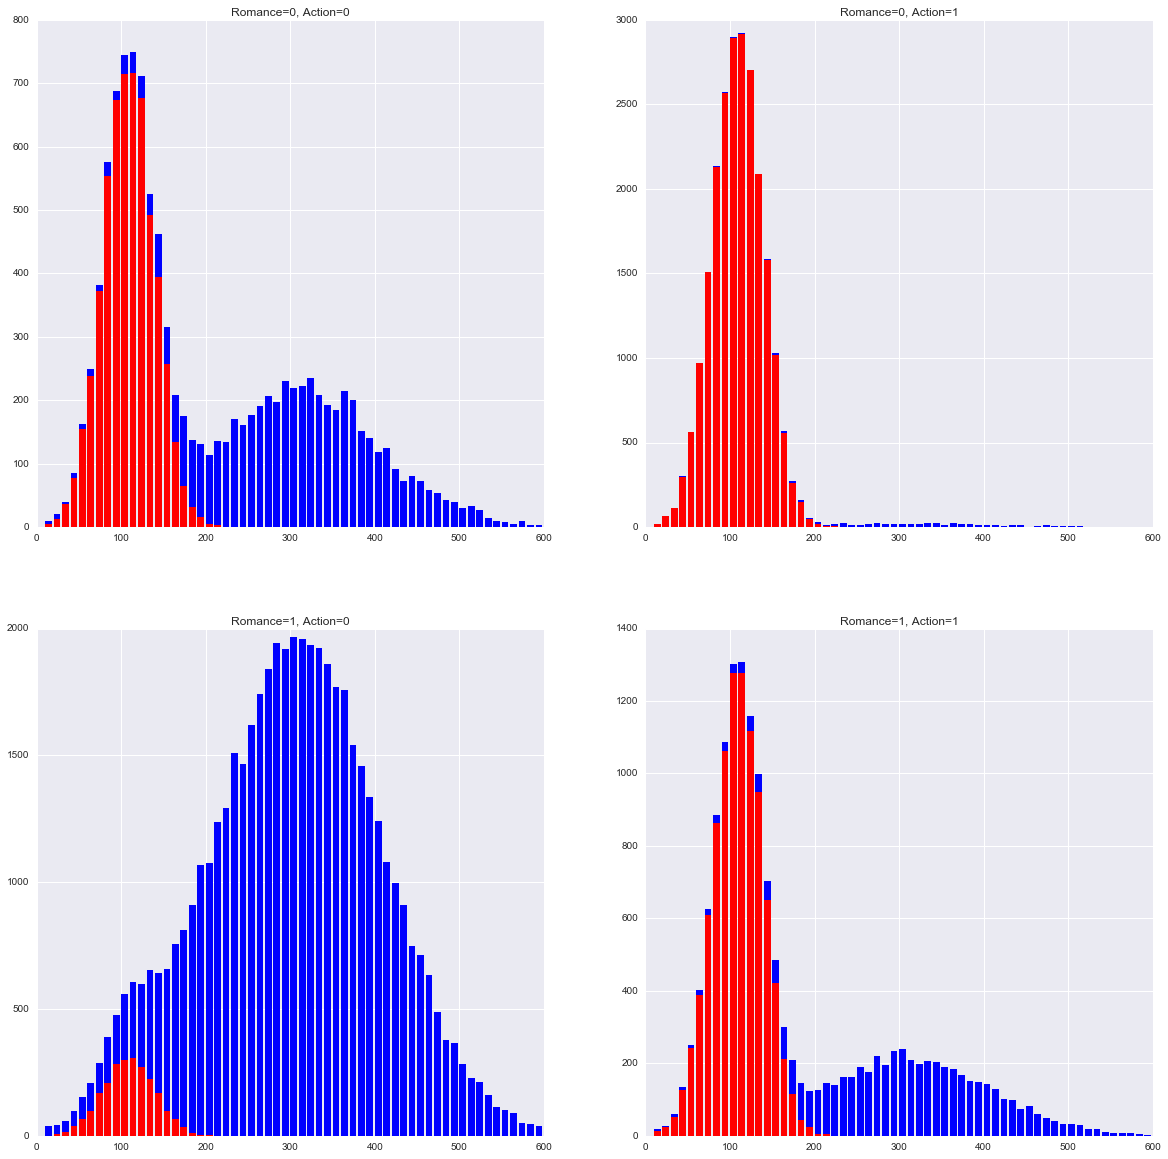

In [79]:
pl.figure(figsize=(20, 20))

for c in xrange(len(p_c)):
    
    for i in xrange(n_interests):
        for j in xrange(n_interests):
            pl.subplot(n_interests, n_interests, n_interests * i + j + 1)
            
            c0 = X_R[(C == 0) & (X_I[:, 0] == i) & (X_I[:, 1] == j)]
            h0 = np.histogram(c0, bins=xrange(0, 601, 10))            
            pl.bar(h0[1][1:], h0[0], 8, color='red', lw=0)
                        
            c1 = X_R[(C == 1) & (X_I[:, 0] == i) & (X_I[:, 1] == j)]
            h1 = np.histogram(c1, bins=xrange(0, 601, 10))
            pl.bar(h1[1][1:], h1[0], 8, bottom=h0[0], color='blue', lw=0)
                        
            pl.title("Romance=%d, Action=%d" % (i, j))
            pl.xlim(0, 600)
            
pl.show()